   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Mean Squared Error: 0.6918
R-squared: 0.4729


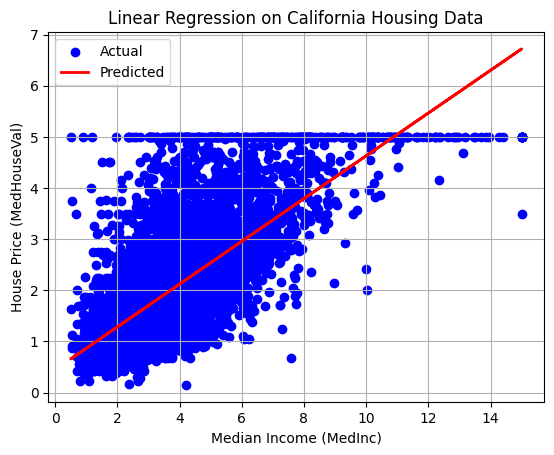

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing()

# Create a DataFrame with feature names
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Display the first few rows of the DataFrame to understand the data
print(df.head())

# Use only one feature for simplicity (e.g., MedInc - median income)
X = df[['MedInc']].values
y = df['MedHouseVal'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('House Price (MedHouseVal)')
plt.title('Linear Regression on California Housing Data')
plt.legend()
plt.grid()
plt.show()


In [9]:
# Assuming df is your DataFrame and it includes all features
X = df[california.feature_names].values

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': california.feature_names, 'Importance': importances})

feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [11]:
feature_importance_df.reset_index(drop=True, inplace=True)
feature_importance_df

,Feature,Importance
0,MedInc,0.519550
1,AveOccup,0.135900
2,Latitude,0.093370
3,Longitude,0.093130
4,HouseAge,0.053155
5,AveRooms,0.044473
6,Population,0.031495
7,AveBedrms,0.028928


In [13]:
from sklearn.preprocessing import StandardScaler

#  Feature importance order from the image
features_order = ['MedInc', 'AveOccup', 'Latitude', 'Longitude', 'HouseAge', 'AveRooms', 'Population', 'AveBedrms']

# Create a DataFrame with feature names
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Create a Linear Regression model
model = LinearRegression()

# Initialize an empty list to collect results
results = []

scaler = StandardScaler()
for i in range(1, len(features_order) + 1):
    # Select top i features
    selected_features = features_order[:i]
    X_selected = df[selected_features].values
    X_selected_scaled = scaler.fit_transform(X_selected)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.3, random_state=42)
    
    # Train the model on the training set with selected features
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Collect the results
    results.append({'num_features': i, 'features': selected_features, 'R2': r2, 'MSE': mse})

# Convert the results to a DataFrame
df_results = pd.DataFrame(results)

df_results.sort_values(by='R2', ascending=False, inplace=True, ignore_index=True)
df_results

,num_features,features,R2,MSE
0,7,"[MedInc, AveOccup, Latitude, Longitude, HouseA...",0.595783,0.530550
1,8,"[MedInc, AveOccup, Latitude, Longitude, HouseA...",0.595770,0.530568
2,6,"[MedInc, AveOccup, Latitude, Longitude, HouseA...",0.595767,0.530572
3,5,"[MedInc, AveOccup, Latitude, Longitude, HouseAge]",0.595687,0.530677
4,4,"[MedInc, AveOccup, Latitude, Longitude]",0.586002,0.543389
5,3,"[MedInc, AveOccup, Latitude]",0.482047,0.679834
6,2,"[MedInc, AveOccup]",0.473984,0.690418
7,1,[MedInc],0.472932,0.691798
